<h1 align= 'center' style='color:#ff8c1a'> Predicting the Closing Price of the stock and Calculating profit using linear Regression 📈 📉 📈 📉 </h1>

<h3 style='color:#9999ff'> Index: </h3>

-   import required libraries  
    
    - Library for data manupulation
    - Library for Linear Algebra
    - libraries for Data Visulization


-   Getting / Collecting Data
    
    - load dataset/csv file 
 

-   Understanding of Data
    
    - Find shape of dataset
    - Collecting information about each feature
    - Getting columns / feature name
 
 
-    Ensuring columns are the right type
    - Convert Data feature type to datetime



-    Cheking null values
    - Find count of null values
    - Find Percentage of null values
    - Check Visually
    
    
    
-    Perform EDA using pandas_profiling    
    - Overview
    - Variables
    - Interactions
    - Correlations
    - Missing values
    - Sample
    
    
-   Perform Prediction 
     - Define model parameters
     - Create lag function
     - Splitting dataset into train and test
     - Data visualization using plotly


- Model Building
    - Importing required libraries
    - Apply Linear Regression
        - Create Object 
        - Fit model
        - Prediction
        - Calculate MSE
        - Calculate R2
        - print 
    - Apply ANN Regression
        - Create Object 
        - Perfor StandardScaler
        - Fit model
        - Prediction
        - Calculate MSE
        - Calculate R2
        - print 
        
        
- Function Calling


- Calculating Profit


- Thank you!

<h2 style='color:#c61aff'> 
    - Import required libraries

In [8]:
# library for handling multiple csv file
import glob

# library for data manupulation
import pandas as pd

# library for mathematical opration
import numpy as np

#libraries for data visulization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import missingno as mn

# Library from where we are fetching data
from pandas_datareader import DataReader
#we can also use
import yahoofinancials as yh

# library helps to get date time 
from datetime import datetime
%matplotlib inline

<h2 style='color:#c61aff'> 
    - Getting data

In [3]:
#name of all csv files are stored in 'all_files' variable
#all_files = [i for i in glob.glob('*.{}'.format('csv'))]
#all_files

In [4]:
#combine all files in the list
#combined_csv = pd.concat([pd.read_csv(f) for f in all_files ])

#export to csv
#combined_csv.to_csv( "stock_data.csv", index=False, encoding='utf-8-sig')

In [4]:
#set time span and start and end date for collecting data

till_date = datetime.now()
from_date = datetime(till_date.year-20,till_date.month,till_date.day)

In [10]:
# fetch data from library 
stock = input('Enter stock name : ').upper()

data = (DataReader(stock,data_source='yahoo',start=from_date,end=till_date)).reset_index()
data.head()

Enter stock name : GOOG


Date       High        Low       Open      Close      Volume  \
0 2004-08-19  51.835709  47.800831  49.813290  49.982655  44871361.0   
1 2004-08-20  54.336334  50.062355  50.316402  53.952770  22942874.0   
2 2004-08-23  56.528118  54.321388  55.168217  54.495735  18342897.0   
3 2004-08-24  55.591629  51.591621  55.412300  52.239197  15319808.0   
4 2004-08-25  53.798351  51.746044  52.284027  52.802086   9232276.0   

   Adj Close  
0  49.982655  
1  53.952770  
2  54.495735  
3  52.239197  
4  52.802086

<h2 style='color:#c61aff'> 
- Understand Data

*Find shape of dataset*

In [11]:
print('Dataframe having {} features and {} entries'.format(data.shape[1],data.shape[0]))

Dataframe having 7 features and 4189 entries


*Collecting information about each feature*

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4189 entries, 0 to 4188
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4189 non-null   datetime64[ns]
 1   High       4189 non-null   float64       
 2   Low        4189 non-null   float64       
 3   Open       4189 non-null   float64       
 4   Close      4189 non-null   float64       
 5   Volume     4189 non-null   float64       
 6   Adj Close  4189 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 229.2 KB


*Features name in our dataset*

In [13]:
print('Features name in our dataset : ',list(data.columns[0:]))

Features name in our dataset :  ['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']


<h2 style='color:#c61aff'> 
    - Ensuring columns are the right type

*In dataset Data feature is of object type insted of datatime so we chnage it to datatime formate*

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4189 entries, 0 to 4188
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4189 non-null   datetime64[ns]
 1   High       4189 non-null   float64       
 2   Low        4189 non-null   float64       
 3   Open       4189 non-null   float64       
 4   Close      4189 non-null   float64       
 5   Volume     4189 non-null   float64       
 6   Adj Close  4189 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 229.2 KB


Great, Our Data is in perfect format

<h2 style='color:#c61aff'>
    - Check Null Values

In [15]:
# find count of nall values
data.isnull().sum()

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [16]:
#find percentage of null values
data.isnull().mean()

Date         0.0
High         0.0
Low          0.0
Open         0.0
Close        0.0
Volume       0.0
Adj Close    0.0
dtype: float64

Text(0.5, 1.0, ' Cheking Null values in each feature Visully')

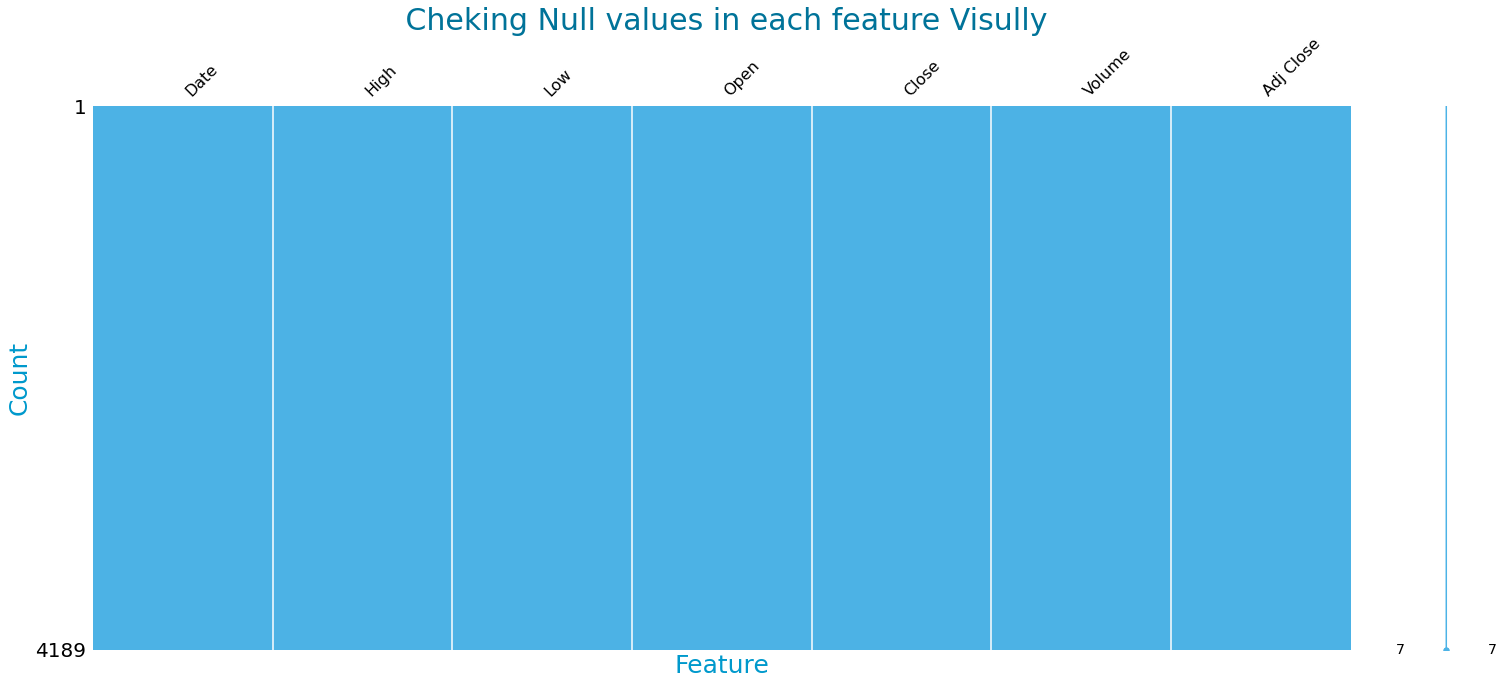

In [17]:
#check null values using matrix plot

mn.matrix(data,color=(.3, .7, .9))
plt.xlabel("Feature",fontsize=25,color='#0099cc')
plt.ylabel("Count",fontsize=25,color='#0099cc')
plt.title(" Cheking Null values in each feature Visully",fontsize=30,color='#007399')

<h2 style='color:#c61aff'> 
    - Perform EDA using pandas_profiling

In [18]:
from pandas_profiling import ProfileReport

In [19]:
auto_eda = ProfileReport(data, title="Performing EDA stock dataset" ,explorative=True,dark_mode=True)

In [16]:
ProfileReport(data,dark_mode=True)

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<h2 style='color:#c61aff'> 
    - Perform Prediction

#### Define model parameters

In [32]:
# Shifts is a day in which you want to predict price of stock
shifts = []
how_many = int(input("Count of number of prediction you want : "))
for i in range(how_many):
    da = int(input("Enter the how to days you want to predit :"))    
    shifts.append(da)
#perform training and testing data
train_per = 0.75 #70%

#plotting dimention
w = 16 #d
h = 6 #height

Count of number of prediction you want : 3
Enter the how to days you want to predit :10
Enter the how to days you want to predit :45
Enter the how to days you want to predit :60


In [33]:
##### create lag function

#which is help us to move close feature

def createlags(data,lag_size):
    shift = -lag_size
    data['Close_lag']=data['Close'].shift(shift)
    return data,shift

In [45]:
#function to split data in training and testing
def SplitData(data,train_per,shift):
    
    #set training percentages
    train_pt = int(len(data)*train_per)
    
    #divide data into train and text 
    train_data = data.iloc[:train_pt,:]
    test_data = data.iloc[train_pt:,:]
    
    # divided data in x , y train, x,y test                      
    x_train = train_data.iloc[:shift,1:-1]
    y_train = train_data['Close_lag'][:shift]
    x_test = test_data.iloc[:shift,1:-1]
    y_test = test_data['Close'][:shift]
    
    return x_train,y_train,x_test,y_test,train_data,test_data



<h2 style='color:#c61aff'> 
    - Data Visulization

In [46]:
# visulization function, visulizing using plotly

def visulization_plotly(train_data,test_data,pred,ticker,w,h,shift_days,name):
    
    #this is parameters for scatter plot
    plot1 = go.Scatter(x = train_data.index,y = train_data['Close'], name = 'Actual Training Data') # train data
    plot2 = go.Scatter(x = test_data.index,y = test_data['Close'], name = 'Actual Testing Data') # test Data
    plot3 = go.Scatter(x = test_data.index,y = pred, name = 'Predicted Data') # Prediction    
    
    # this line set parameters
    line = { 'data':[plot1,plot2,plot3],
            'layout':
                {
                    'xaxis':{'title':'Date'},
                    'yaxis':{'title':'$'},
                    'title' : name + ' - ' + ticker + ' - ' +str(shift_days)
                }          
            }
    fig = go.Figure(line)
    fig.show()

<h2 style='color:#c61aff'> 
    - Model Building

In [47]:
# import libraries for model building

from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

*create function of each*

In [48]:
# linear regression
def LinearReg_fun(x_train,y_train,x_test,y_test):
    print("Linear Regression ")
    
    #regression model
    lr = LinearRegression()
    
    #fit model
    lr.fit(x_train,y_train)
    
    #predict
    lr_pred = lr.predict(x_test)
    
    #calculate MSE
    lr_mse = mean_squared_error(y_test,lr_pred)
    
    #calculate R2
    lr_r2 = lr.score(x_test,y_test)
    
    print('MSE is : {} \nR2 is : {}'.format(lr_mse,lr_r2))
    return lr_pred

In [49]:
# ANN regression
def ANN_fun(x_train,y_train,x_test,y_test):
    print("ANN Regression")
    
    #perfor standardscaler
    scaler = StandardScaler()
    scaler.fit(x_train)
    x_train_scaled = scaler.transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    
    #regression model
    mlp = MLPRegressor(activation='identity',random_state=1,max_iter=1000)
    
    #fit model
    mlp.fit(x_train_scaled,y_train)
    
    #predict
    mlp_pred = mlp.predict(x_test_scaled)
    
    #calculate MSE
    mlp_mse = mean_squared_error(y_test,lr_pred)
    
    #calculate R2
    mlp_r2 = mlp.score(x_test_scaled,y_test)
    
    print('MSE is : {} \nR2 is : {}'.format(mlp_mse,mlp_r2))
    return mlp_pred

<h2 style='color:#c61aff'> 
    - Function calling

In [50]:
# Call function

for j in shifts:
    print(str(j)+' -days out prediction \n -----------------------------------')
    
    # create lags
    data_lag,shift = createlags(data,j)
    
    #split the data
    x_train,y_train,x_test,y_test,train_data,test_data = SplitData(data_lag,train_per,shift)
    
    #Linear Regression
    lr_pred = LinearReg_fun(x_train,y_train,x_test,y_test)
    visulization_plotly(train_data,test_data,lr_pred,stock,w,h,j,'Linear Regression')
    
    #ANN Regression
    mlp_pred = ANN_fun(x_train,y_train,x_test,y_test)
    visulization_plotly(train_data,test_data,lr_pred,stock,w,h,j,'Linear Regression')

10 -days out prediction 
 -----------------------------------
Linear Regression 
MSE is : 3.4123870336465 
R2 is : 0.999957896237622


ANN Regression
MSE is : 3.4123870336465 
R2 is : 0.9993794330933423


45 -days out prediction 
 -----------------------------------
Linear Regression 
MSE is : 28.04565316804658 
R2 is : 0.999517961330142


ANN Regression
MSE is : 28.04565316804658 
R2 is : 0.9989663946365278


60 -days out prediction 
 -----------------------------------
Linear Regression 
MSE is : 69.11921690734101 
R2 is : 0.9986757918371947


ANN Regression
MSE is : 69.11921690734101 
R2 is : 0.9978592630244275


<h2 style='color:#c61aff'>  
    - Calculting Profit

In [51]:
def calprofit(test_data):
    pd.set_option('mode.chained_assignment',None)
    test_data['pred'] = np.nan
    test_data['pred'].iloc[:-j] = lr_pred
    
    test_data['Change'] = test_data['Close_lag']-test_data['Close']
    test_data['Change_pred'] = test_data['Close_lag'] - test_data['Close']
    test_data['Made_Money?'] = np.where(test_data['Change_pred']/test_data['Change']>0,1,-1)
    test_data['Profit'] = np.abs(test_data['Change_pred'])*test_data['Made_Money?']
    
    profit = test_data['Profit'].sum()
    days = len(test_data['Made_Money?']==1)
    
    return "- Would have made $ {}, Percentage of days we made money : {}".format(profit,days)

In [52]:
calprofit(test_data)

'- Would have made $ 125981.00866699219, Percentage of days we made money : 1048'

<h1 align='center' style='color:#80ff80'>  Thank you !